# ___Модель для деткции: картонных коробок, стекла, металла, бумаги, пластика и органическорого отхода___

In [ ]:
# устанавливаем библиотеку roboflow для получения dataset

%pip install -q roboflow

In [ ]:
# устанавливаем библиотеку ultralytics для использования модели YOLO

%pip install -q ultralytics

In [6]:
# импортируем все необходимые библиотеки

from roboflow import Roboflow
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

In [ ]:
# зугружаем dataset на котором проводилось обучения модели YOLO
# данный dataset предназначен для оценки обученной модели

rf = Roboflow(api_key='iQWleNUHxkrlNJNQx8D3') # api key - для доступа в roboflow
project = rf.workspace('image-processing-home-assignment').project('trash-detection-kfzaq') # источник dataset
dataset = project.version(10).download('yolov8') # версия проекта

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Trash-Detection-10 in yolov8:: 100%|██████████| 15032/15032 [00:25<00:00, 580.11it/s] 


## Ниже ячейка запуск модели для анализа фото (картинки) от пользователя.
> модель обучалась с 3 разными конфигурациями:  
>> наименование весов (лучший чекпоинт) - конфигурация при обучении  
>> best_yolo8n_ep_80_batch_16.pt - model version: yolo8n, epochs: 80, batch size: 16  
>> best_yolo8s_ep_100_batch_16.pt - model version: yolo8s, epochs: 100, batch size: 16  
>> best_yolo8s_ep_110_batch_8.pt - model version: yolo8s, epochs: 110, batch size: 8


image 1/1 d:\02_ \01_ Data Science_ML\\MIFI_ML\08_ Project_1_semester\data\trash_1.jpg: 576x640 1 cardboard, 1 metal, 1 paper, 436.1ms
Speed: 14.2ms preprocess, 436.1ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 640)


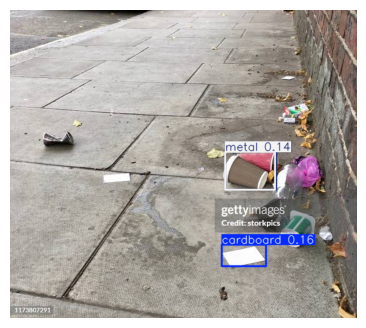

In [ ]:
model = YOLO('best_yolo8n_ep_80_batch_16.pt') # можно выбрять один из 3 весов (лучший чекпоинт)

results = model('data/trash_1.jpg', conf=0.1) # в папку data вложить 
img = results[0].plot() # визуализация резульатата
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # для коррекции (уменьшения) синего оттенка
plt.figure(figsize=(6, 4))  # задаём меньшие размеры окна
plt.imshow(img)
plt.axis('off')
plt.show()

In [21]:
# в выброном dataset есть тестовая выборка, поэтому оценку проводим по ней 
test_metrics = model.val(data='Trash-Detection-10/data.yaml', split='test')

print('mAP@0.5:', test_metrics.box.map50)
print('mAP@0.5:0.95:', test_metrics.box.map)
print('Precision:', test_metrics.box.mp)
print('Recall:', test_metrics.box.mr)

Ultralytics 8.3.237  Python-3.13.1 torch-2.9.1+cpu CPU (Intel Core i5-3230M 2.60GHz)
val: Fast image access  (ping: 0.20.2 ms, read: 89.857.8 MB/s, size: 40.5 KB)
val: Scanning D:\02_ Обучение\01_ Data Science_ML\МИФИ\MIFI_ML\08_ Project_1_semester\Trash-Detection-10\test\labels.cache... 1007 images, 295 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1007/1007 814.6Kit/s 0.0s
WARNING Box and segment counts should be equal, but got len(segments) = 168, len(boxes) = 2008. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 63/63 7.3s/it 7:386.7ss
                   all       1007       2008      0.675      0.503      0.604        0.4
             cardboard        237        309      0.665       0.43      0.554      0.404
                 glass        102        124  